
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 1
-----

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pywaffle import Waffle

import os

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

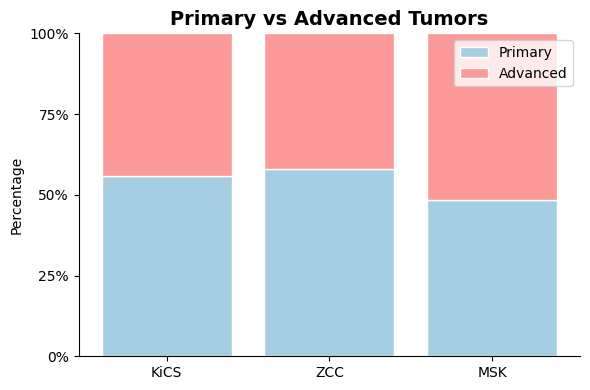

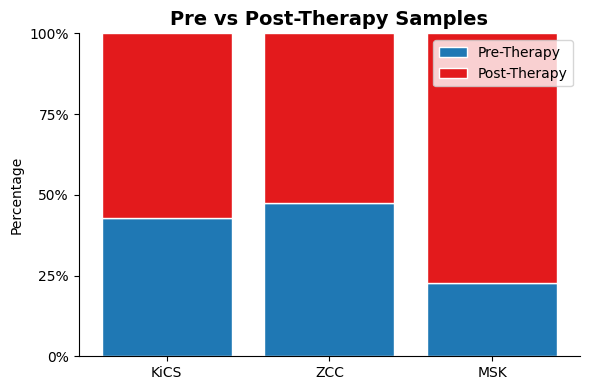

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Toy data (based on your figure)
data_primary_advanced = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Primary': [159, 153, 30],
    'Advanced': [126, 111, 32]
})

data_pre_post = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Pre-Therapy': [122, 125, 14],
    'Post-Therapy': [163, 139, 48]
})

def plot_100pct_stacked_bar(data, title, colors, labels):
    # Normalize rows to get percentages
    data_pct = data.copy()
    categories = data.columns[1:]
    data_pct[categories] = data_pct[categories].div(data_pct[categories].sum(axis=1), axis=0)

    # Plot
    fig, ax = plt.subplots(figsize=(6, 4))

    bottom = [0] * len(data)
    for cat, color, label in zip(categories, colors, labels):
        ax.bar(
            data['Cohort'],
            data_pct[cat],
            bottom=bottom,
            color=color,
            label=f"{label}",
            edgecolor='white'
        )
        bottom = bottom + data_pct[cat]

    # Labels, legend, formatting
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
    ax.legend(title='', loc='upper right')
    ax.spines[['right', 'top']].set_visible(False)
    plt.tight_layout()
    return fig, ax

# Color schemes (feel free to adjust)
colors_pa = ['#a6cee3', '#fb9a99']     # Primary (light blue), Advanced (light red)
labels_pa = ['Primary', 'Advanced']

colors_tp = ['#1f78b4', '#e31a1c']     # Pre (dark blue), Post (dark red)
labels_tp = ['Pre-Therapy', 'Post-Therapy']

# Create both plots
plot_100pct_stacked_bar(data_primary_advanced, 'Primary vs Advanced Tumors', colors_pa, labels_pa)
plot_100pct_stacked_bar(data_pre_post, 'Pre vs Post-Therapy Samples', colors_tp, labels_tp)

plt.show()


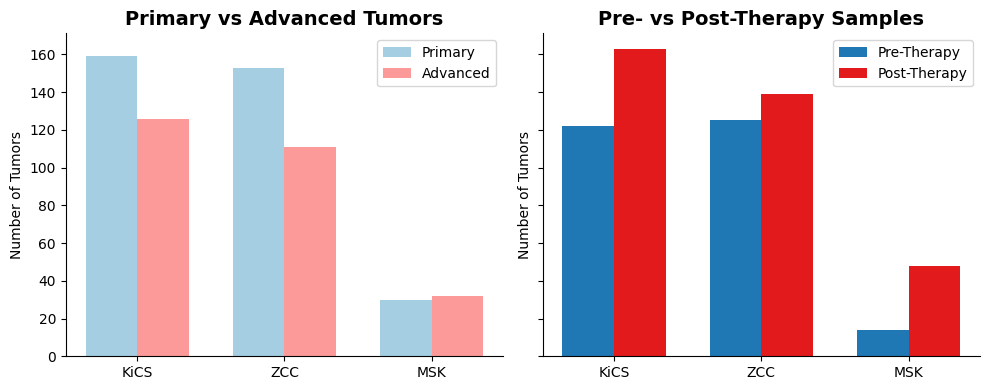

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Toy data extracted from your figure
data_primary_advanced = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Primary': [159, 153, 30],
    'Advanced': [126, 111, 32]
})

data_pre_post = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Pre-Therapy': [122, 125, 14],
    'Post-Therapy': [163, 139, 48]
})

def plot_grouped_bar(df, title, colors, labels, ax):
    x = np.arange(len(df['Cohort']))  # label locations
    width = 0.35  # width of bars

    ax.bar(x - width/2, df[labels[0]], width, label=labels[0], color=colors[0])
    ax.bar(x + width/2, df[labels[1]], width, label=labels[1], color=colors[1])

    # Labels and ticks
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(df['Cohort'])
    ax.set_ylabel('Number of Tumors')
    ax.legend(title='')
    ax.spines[['right', 'top']].set_visible(False)

# Plot both in one figure
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

plot_grouped_bar(
    data_primary_advanced,
    'Primary vs Advanced Tumors',
    colors=['#a6cee3', '#fb9a99'],
    labels=['Primary', 'Advanced'],
    ax=axes[0]
)

plot_grouped_bar(
    data_pre_post,
    'Pre- vs Post-Therapy Samples',
    colors=['#1f78b4', '#e31a1c'],
    labels=['Pre-Therapy', 'Post-Therapy'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()


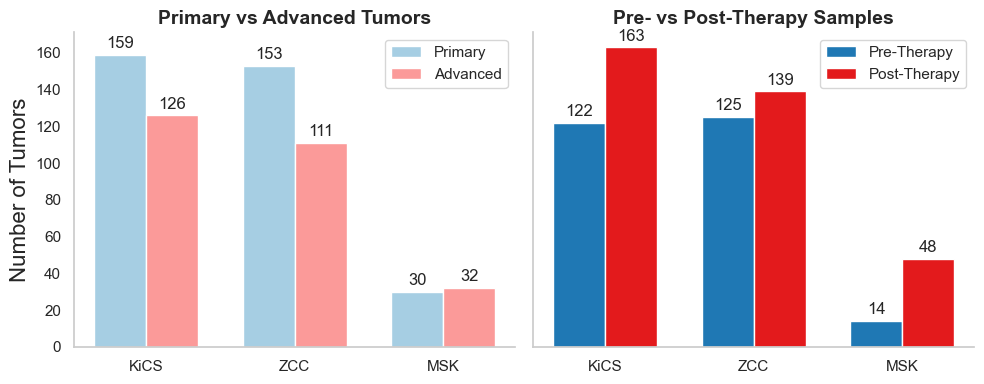

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data_primary_advanced = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Primary': [159, 153, 30],
    'Advanced': [126, 111, 32]
})

data_pre_post = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Pre-Therapy': [122, 125, 14],
    'Post-Therapy': [163, 139, 48]
})

def plot_grouped_bar_with_labels(df, title, colors, labels, ylab, ax):
    x = np.arange(len(df['Cohort']))
    width = 0.35

    bars1 = ax.bar(x - width/2, df[labels[0]], width, label=labels[0], color=colors[0])
    bars2 = ax.bar(x + width/2, df[labels[1]], width, label=labels[1], color=colors[1])

    # Add count labels above each bar
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 2,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=12
        )

    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(df['Cohort'])
    if ylab:
        ax.set_ylabel('Number of Tumors', fontsize=16)
    ax.legend(title='')

    # Remove gridlines and spines
    ax.grid(False)
    ax.spines[['right', 'top']].set_visible(False)

# Plot both subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

plot_grouped_bar_with_labels(
    data_primary_advanced,
    'Primary vs Advanced Tumors',
    colors=['#a6cee3', '#fb9a99'],
    labels=['Primary', 'Advanced'],
    ylab=True,
    ax=axes[0]
)

plot_grouped_bar_with_labels(
    data_pre_post,
    'Pre- vs Post-Therapy Samples',
    colors=['#1f78b4', '#e31a1c'],
    labels=['Pre-Therapy', 'Post-Therapy'],
    ylab=False,
    ax=axes[1]
)

plt.tight_layout()
plt.show()


-----
## Panel a

-----
##### Define colors & fonts

In [39]:
paired_cols = sns.color_palette("Paired")

'''font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }'''

font = {'weight': 'normal',
        'size': 24,
        }

-----
##### Input Data


In [40]:
KZM_df = pd.read_csv(os.path.join(root_dir, 'source_data/mfig_1-panel_a.tsv'), sep='\t', index_col=0)

-----
##### Plotting using PyWaffle: Panel (a), all together

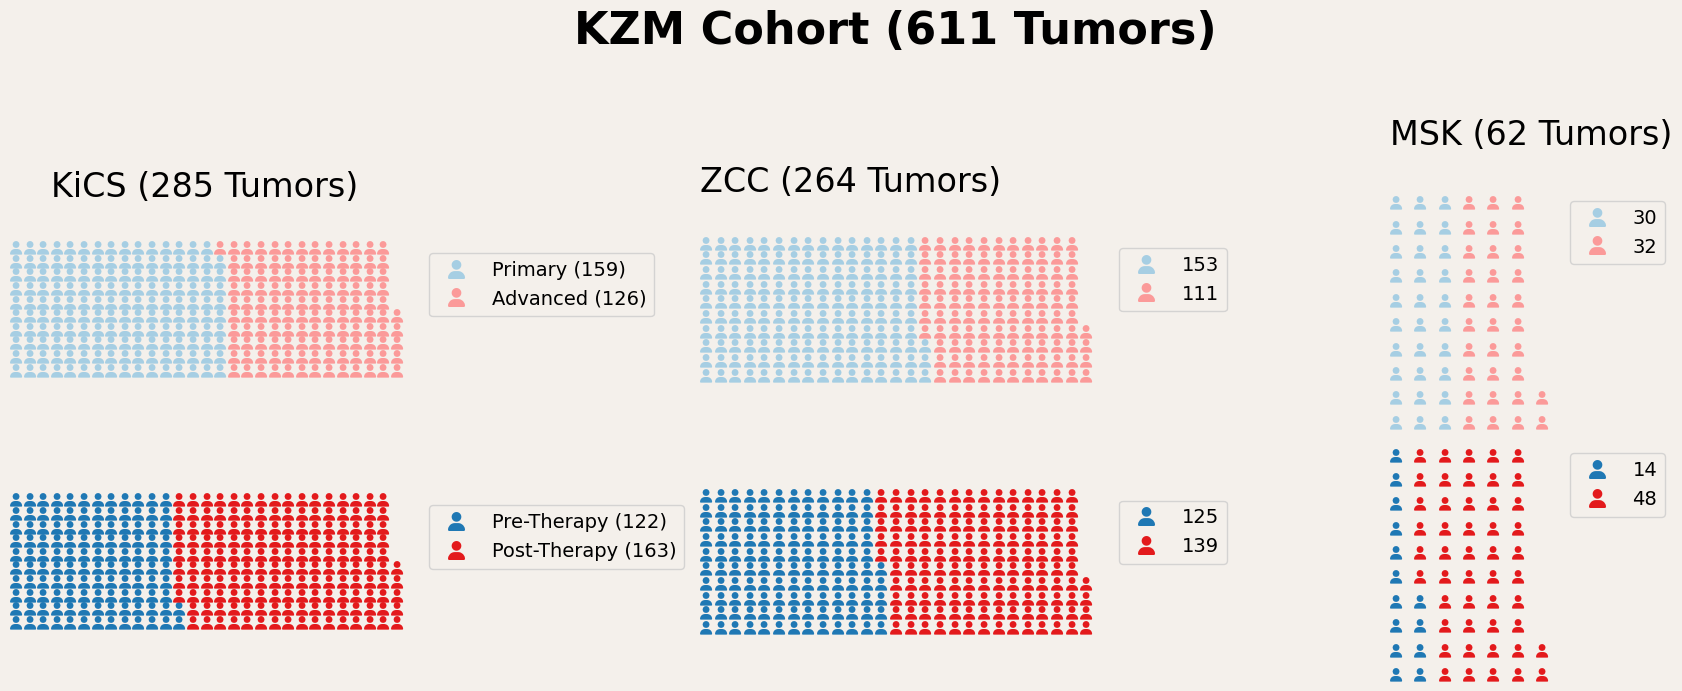

In [41]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        231: {
            'values': KZM_df['KiCS'][0:2],
            'labels': [f"Primary ({KZM_df['KiCS'].tolist()[0]})", f"Advanced ({KZM_df['KiCS'].tolist()[1]})"], #[f"" KZM_df['KiCS'].tolist()[0:2]],
            'colors':[paired_cols[0],paired_cols[4]],
            'icon_legend': True,
            'legend': {'title': '', 'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14, 'facecolor': '#f4f0eb'},
            'title': {'label': 'KiCS (285 Tumors)\n', 'loc': 'center', 'fontdict': font},
            'rows': 10
        },
        232: {
            'values': KZM_df['ZCC'][0:2],
            'labels': KZM_df['ZCC'].tolist()[0:2],
            'colors':[paired_cols[0],paired_cols[4]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14, 'facecolor': '#f4f0eb'},
            'title': {'label': 'ZCC (264 Tumors)\n', 'loc': 'left', 'fontdict': font},
            'rows': 10
        },
        233: {
            'values': KZM_df['MSK'][0:2],
            'labels': KZM_df['MSK'].tolist()[0:2],
            'colors':[paired_cols[0],paired_cols[4]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14, 'facecolor': '#f4f0eb'},
            'title': {'label': 'MSK (62 Tumors)\n', 'loc': 'left', 'fontdict': font},
            'rows': 10
        },
        234: {
            'values': KZM_df['KiCS'][2:],
            'labels': [f"Pre-Therapy ({KZM_df['KiCS'].tolist()[2]})", f"Post-Therapy ({KZM_df['KiCS'].tolist()[3]})"],
            'colors':[paired_cols[1], paired_cols[5]],
            'icon_legend': True,
            'legend': {'title': '', 'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14, 'facecolor': '#f4f0eb'},
            'title': {'label': ''},
            'rows': 10
        },
        235: {
            'values': KZM_df['ZCC'][2:],
            'labels': KZM_df['ZCC'].tolist()[2:],
            'colors':[paired_cols[1], paired_cols[5]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14, 'facecolor': '#f4f0eb'},
            'title': {'label': ''},
            'rows': 10
        },
        236: {
            'values': KZM_df['MSK'][2:],
            'labels': KZM_df['MSK'].tolist()[2:],
            'colors':[paired_cols[1], paired_cols[5]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14, 'facecolor': '#f4f0eb'},
            'title': {'label': ''},
            'rows': 10
        },
    },
    #rows=10,
    figsize=(18, 7),
    icons='user',
    icon_size=10,
    interval_ratio_x=0.5,
    interval_ratio_y=0.5
)

fig.suptitle('KZM Cohort (611 Tumors)\n', fontsize=32, fontweight='bold', horizontalalignment='center')
#fig.supxlabel('1 block = 1 sample', fontsize=8, x=0.025)
fig.set_facecolor('#f4f0eb')

plt.show()
#fig.savefig(os.path.join(fig_out, "Fig_1a.pdf"), bbox_inches="tight")

-----
##### Plotting using PyWaffle: Panel (a), separately for each cohort

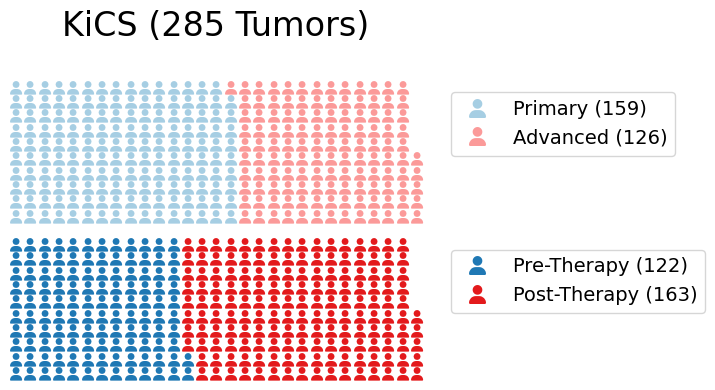

In [42]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            'values': KZM_df['KiCS'][0:2],
            'labels': [f"Primary ({KZM_df['KiCS'].tolist()[0]})", f"Advanced ({KZM_df['KiCS'].tolist()[1]})"], #[f"" KZM_df['KiCS'].tolist()[0:2]],
            'colors':[paired_cols[0],paired_cols[4]],
            'icon_legend': True,
            'legend': {'title': '', 'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14},
            'title': {'label': 'KiCS (285 Tumors)\n', 'loc': 'center', 'fontdict': font},
            'rows': 10
        },
        212: {
            'values': KZM_df['KiCS'][2:],
            'labels': [f"Pre-Therapy ({KZM_df['KiCS'].tolist()[2]})", f"Post-Therapy ({KZM_df['KiCS'].tolist()[3]})"],
            'colors':[paired_cols[1], paired_cols[5]],
            'icon_legend': True,
            'legend': {'title': '', 'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14},
            'title': {'label': ''},
            'rows': 10
        },
    },
    rows=10,
    figsize=(12, 4),
    icons='user',
    icon_size=10,
    interval_ratio_x=0.5,
    interval_ratio_y=0.5
)

#fig.suptitle('KZM Cohort (611 Tumors)\n', fontsize=32, fontweight='bold', horizontalalignment='center')
fig.set_facecolor('#FFFFFF')

plt.show()
fig.savefig(os.path.join(fig_out, "Fig_1a1.pdf"), bbox_inches="tight")

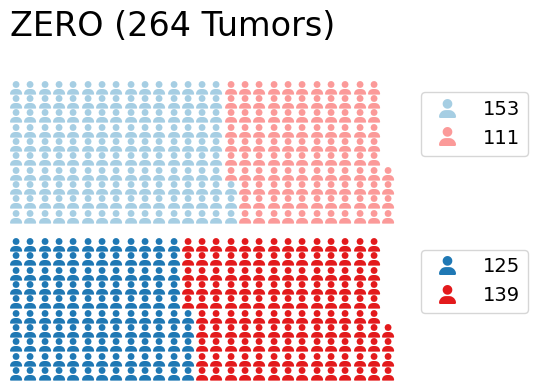

In [43]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            'values': KZM_df['ZCC'][0:2],
            'labels': KZM_df['ZCC'].tolist()[0:2],
            'colors':[paired_cols[0],paired_cols[4]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14},
            'title': {'label': 'ZERO (264 Tumors)\n', 'loc': 'left', 'fontdict': font},
            'rows': 10
        },
        212: {
            'values': KZM_df['ZCC'][2:],
            'labels': KZM_df['ZCC'].tolist()[2:],
            'colors':[paired_cols[1], paired_cols[5]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14},
            'title': {'label': ''},
            'rows': 10
        },
    },
    rows=10,
    figsize=(12, 4),
    icons='user',
    icon_size=10,
    interval_ratio_x=0.5,
    interval_ratio_y=0.5
)

fig.set_facecolor('#FFFFFF')

plt.show()
fig.savefig(os.path.join(fig_out, "Fig_1a2.pdf"), bbox_inches="tight")

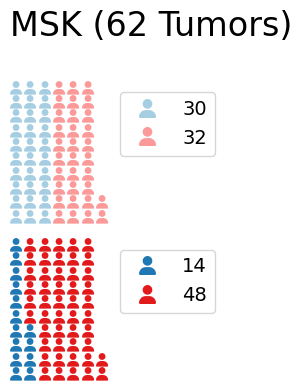

In [10]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            'values': KZM_df['MSK'][0:2],
            'labels': KZM_df['MSK'].tolist()[0:2],
            'colors':[paired_cols[0],paired_cols[4]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14},
            'title': {'label': 'MSK (62 Tumors)\n', 'loc': 'left', 'fontdict': font},
            'rows': 10
        },
        212: {
            'values': KZM_df['MSK'][2:],
            'labels': KZM_df['MSK'].tolist()[2:],
            'colors':[paired_cols[1], paired_cols[5]],
            'icon_legend': True,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 14},
            'title': {'label': ''},
            'rows': 10
        },
    },
    rows=10,
    figsize=(12, 4),
    icons='user',
    icon_size=10,
    interval_ratio_x=0.5,
    interval_ratio_y=0.5
)

fig.set_facecolor('#FFFFFF')

plt.show()
fig.savefig(os.path.join(fig_out, "Fig_1a3.pdf"), bbox_inches="tight")

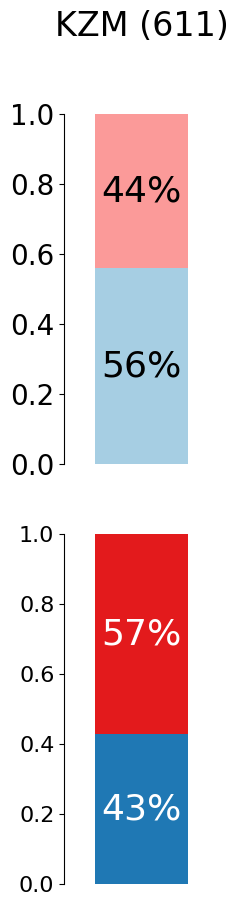

In [44]:
fig, axes = plt.subplots(2,1, figsize=(2, 10))

KZM_df_state = KZM_df.loc[['Primary', 'Non-Primary']].copy()
KZM_df_state['KZM'] = KZM_df_state.sum(axis=1)
KZM_df_state = KZM_df_state.T
KZM_df_state = KZM_df_state.div(KZM_df_state.sum(axis=1), axis=0)

ax1 = pd.DataFrame(KZM_df_state.loc['KZM']).T.plot.bar(stacked=True, color=[paired_cols[0],paired_cols[4]], ax=axes[0], width=0.75, fontsize=20)
ax1.spines[['right', 'top', 'bottom']].set_visible(False)
ax1.get_legend().remove()
ax1.set_xticks(ticks=[], labels=[])
ax1.set_xlabel('\n', fontsize=24)

labels1 = [f'{i:.0%}' for i in KZM_df_state.loc['KZM'].to_numpy().flatten(order='F')]
for i, patch in enumerate(ax1.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax1.annotate(labels1[i], (x, y), ha='center', va='center', c='black', fontsize=26)

ax1.set_ylim(0, 1)
ax1.set_title('KZM (611)', x=0.5, y=1.2, fontsize=24)


KZM_df_thr = KZM_df.loc[['Pre-Therapy', 'Post-Therapy']].copy()
KZM_df_thr['KZM'] = KZM_df_thr.sum(axis=1)
KZM_df_thr = KZM_df_thr.T
KZM_df_thr = KZM_df_thr.div(KZM_df_thr.sum(axis=1), axis=0)

ax2 = pd.DataFrame(KZM_df_thr.loc['KZM']).T.plot.bar(stacked=True, color=[paired_cols[1],paired_cols[5]], ax=axes[1], width=0.75, fontsize=16)
ax2.spines[['right', 'top', 'bottom']].set_visible(False)
ax2.get_legend().remove()
ax2.set_xticks(ticks=[], labels=[])
ax2.set_xlabel('', fontsize=24)

labels2 = [f'{i:.0%}' for i in KZM_df_thr.loc['KZM'].to_numpy().flatten(order='F')]
for i, patch in enumerate(ax2.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax2.annotate(labels2[i], (x, y), ha='center', va='center', c='white', fontsize=26)

ax2.set_ylim(0, 1)

fig.savefig(os.path.join(fig_out, "Fig_1abars.pdf"), bbox_inches="tight")

-----
## Panels c-e

-----
##### Import patients metadata

In [14]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/kzm_md.tsv'), sep='\t', index_col=0)
treated_samples = kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()
kzm611_md.head(2)

,Patient_id,Cohort,State,Therapy,Sex,Type,Tumor_class,SBS,DBS,ID,Thr_State,Burden,Radiation
Sample_id,,,,,,,,,,,,,
KiCS0002_321321,KiCS0002,KiCS,Non-Primary,Post-Therapy,Female,GCT,Solid,15207,403,1117,Advanced-Treated,low,N
KiCS0003_285201,KiCS0003,KiCS,Non-Primary,Post-Therapy,Female,MFT,Solid,1596,7,175,Advanced-Treated,low,N


In [15]:
KZM_drugs_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_therapy_individuals_counts.txt'), sep='\t', index_col=0)
KZM_drugs_df = pd.concat([KZM_drugs_df, kzm611_md[['Radiation', 'Type']]], axis=1)
KZM_drugs_df.Radiation = [1 if KZM_drugs_df.Radiation.iloc[x]=='Y' else 0 for x in range(KZM_drugs_df.shape[0])]

print(f"Total number of therapy agents used + Radiation therapy: {KZM_drugs_df.shape[1]-1}")
print(f"Total number of therapy data points collected: {KZM_drugs_df.iloc[:,0:-1].sum().sum()}")

Total number of therapy agents used + Radiation therapy: 86
Total number of therapy data points collected: 3195


In [16]:
## Binary (0,1) version
KZM_drugs_bin = KZM_drugs_df.iloc[:,0:-1].copy()
KZM_drugs_bin[KZM_drugs_bin>0] = 1

In [17]:
KZM_drugs_bin2 = KZM_drugs_bin.copy()
KZM_drugs_bin2['Patient_id'] = [kzm611_md.loc[x, 'Patient_id'] for x in KZM_drugs_bin2.index]
patients_df = KZM_drugs_bin2.groupby('Patient_id').sum()
patients_thr_df = KZM_drugs_bin2.loc[treated_samples].groupby('Patient_id').sum()

print(f"Average number of drugs per patient: {patients_df.sum(axis=1).mean()}")
print(f"Average number of drugs per treated patient: {patients_thr_df.sum(axis=1).mean()}")

Average number of drugs per patient: 2.555350553505535
Average number of drugs per treated patient: 4.537704918032787


In [18]:
KZM_drugs_df = KZM_drugs_df[KZM_drugs_bin.loc[:, KZM_drugs_bin.sum(axis=0)>1].columns.tolist()+['Type']]
KZM_drugs_df.shape

(611, 57)

In [19]:
## Create dict of drug classes
drug_classes = pd.read_csv(os.path.join(root_dir, 'source_data/Therapy_categories.tsv'), sep='\t', engine='python')
drug_class_dict = dict(zip(drug_classes.Drug, drug_classes.Class))
drug_subclass_dict = dict(zip(drug_classes.Drug, drug_classes.Subclass))

In [76]:
KZM_drugs_pat = KZM_drugs_df.copy()
KZM_drugs_pat['Patient_id'] = [kzm611_md.loc[x, 'Patient_id'] for x in KZM_drugs_pat.index]
KZM_drugs_pat = KZM_drugs_pat.drop(['Type'], axis=1)
KZM_drugs_pat.head(2)

,Dacarbazine,MIBG,Tazematostat,Thioguanine,Daunorubicin,Cyclophosphamide,Methotrexate,Oxaliplatin,Temozolomide,Docetaxel,...,Cytarabine,GMCSF,Dinutuximab,Asparaginase,Paclitaxel,Lomustine,Cisplatin,Leucovorin,Radiation,Patient_id
KiCS0002_321321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,5,0,0,KiCS0002
KiCS0003_285201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KiCS0003


In [82]:
KZM_drugs_pat_post = KZM_drugs_pat.copy()
KZM_drugs_pat_post['total'] = KZM_drugs_pat_post.iloc[:,0:-1].sum(axis=1)
KZM_drugs_pat_post = KZM_drugs_pat_post[KZM_drugs_pat_post.total>0]
KZM_drugs_pat_post = KZM_drugs_pat_post.drop(['total'], axis=1)
KZM_drugs_pat_post.Patient_id.nunique()

238

In [83]:
KZM_drugs_pat_post = KZM_drugs_pat_post.groupby('Patient_id').sum()
KZM_drugs_pat_post = KZM_drugs_pat_post.map(lambda x: 1 if x != 0 else 0)

In [109]:
drug_counts.shape

(56,)

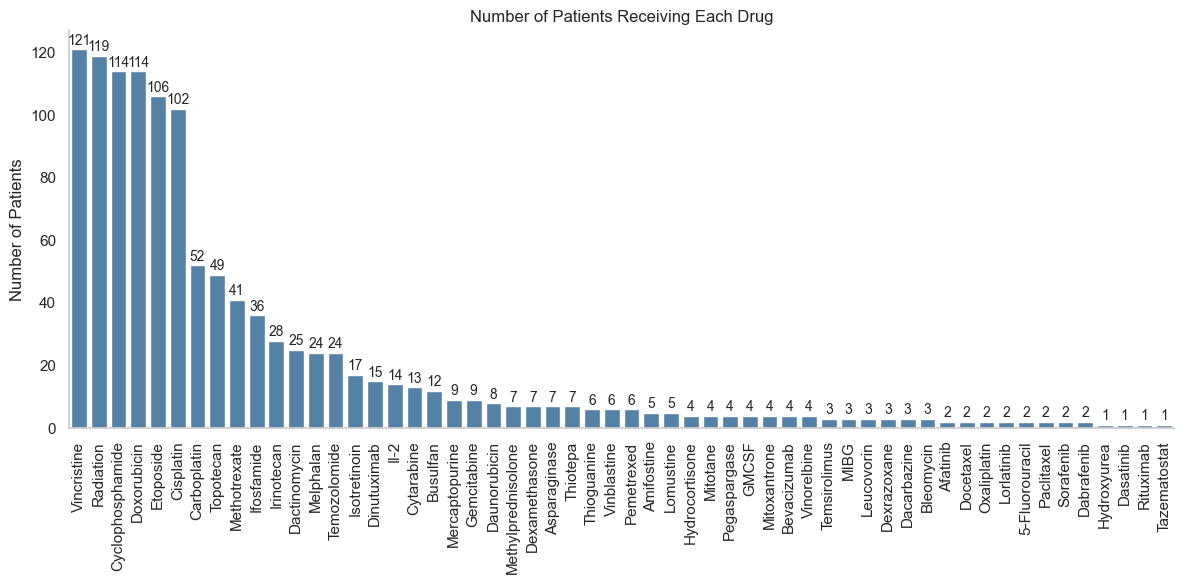

In [105]:
drug_counts = KZM_drugs_pat_post.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=drug_counts.index, y=drug_counts.values, color='steelblue')

# Add count labels on top of each bar
for i, count in enumerate(drug_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.ylabel("Number of Patients")
plt.title("Number of Patients Receiving Each Drug")

# Clean up plot
ax.set_xlabel("")
ax.set_ylabel("Number of Patients")
ax.set_title("Number of Patients Receiving Each Drug")
ax.grid(False)  # Turn off gridlines
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


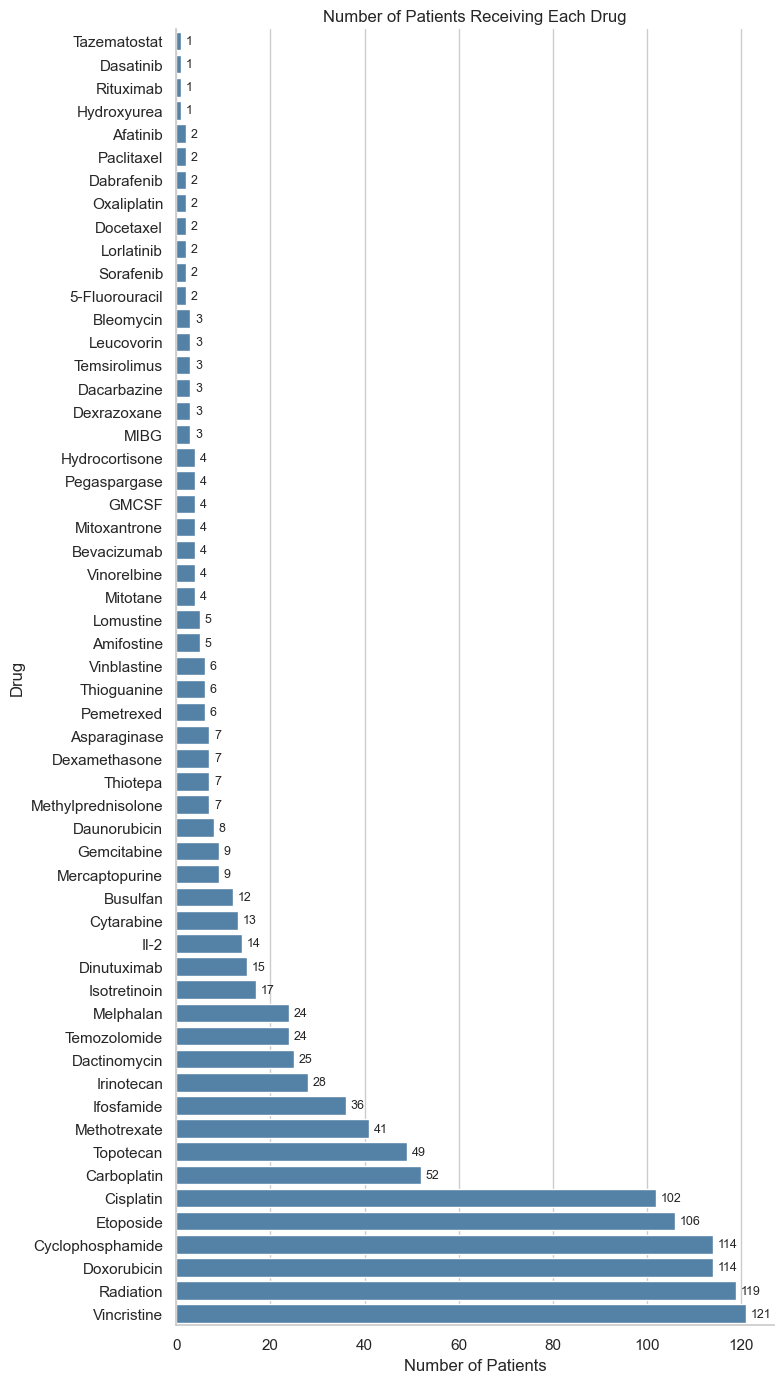

In [113]:
drug_counts = KZM_drugs_pat_post.sum(axis=0).sort_values(ascending=True)  # ascending for better layout

plt.figure(figsize=(8, 14))  # taller figure for readability
ax = sns.barplot(x=drug_counts.values, y=drug_counts.index, color='steelblue')

# Add count labels
for i, count in enumerate(drug_counts.values):
    ax.text(count + 1, i, str(count), va='center', fontsize=9)

ax.set_xlabel("Number of Patients")
ax.set_ylabel("Drug")
ax.set_title("Number of Patients Receiving Each Drug")
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


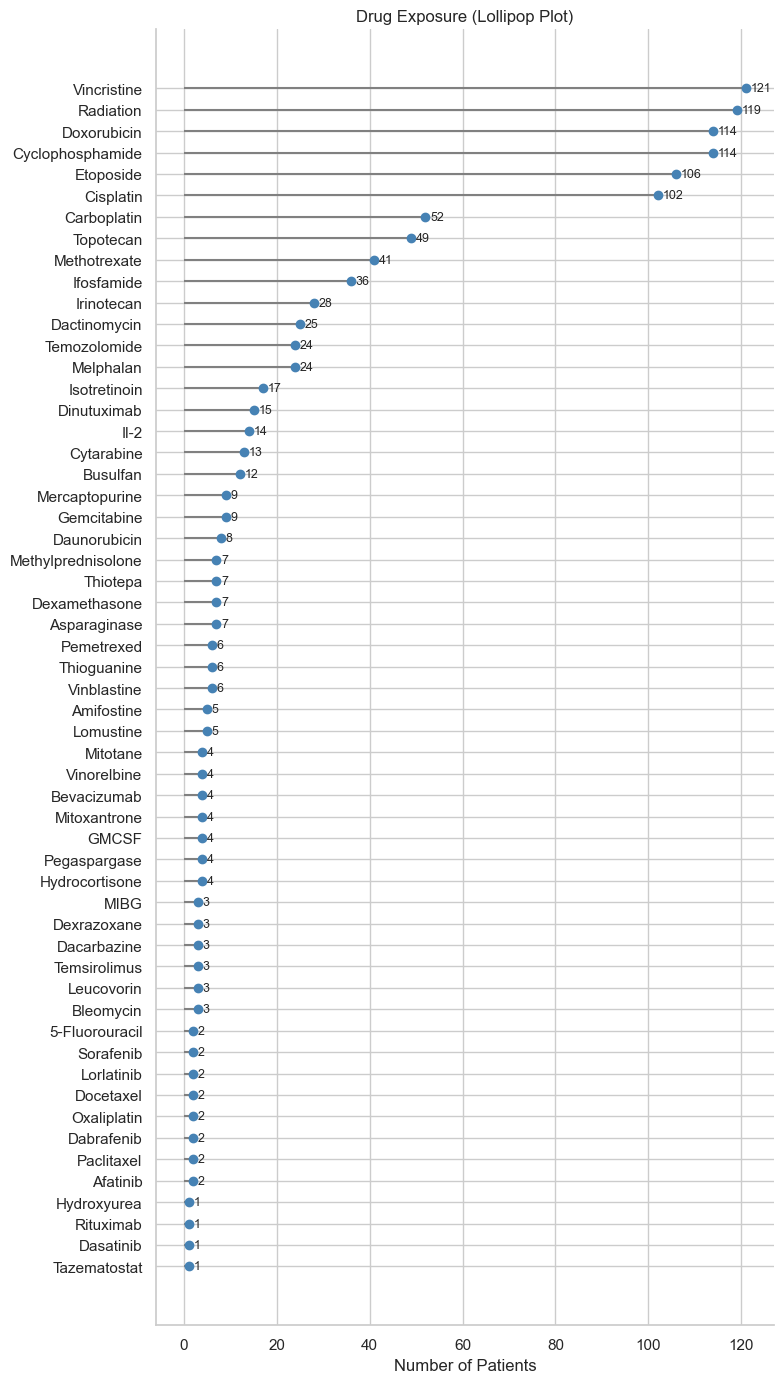

In [112]:
drug_counts = KZM_drugs_pat_post.sum(axis=0).sort_values(ascending=True)

plt.figure(figsize=(8, 14))
ax = plt.gca()
ax.hlines(y=drug_counts.index, xmin=0, xmax=drug_counts.values, color='gray')
ax.plot(drug_counts.values, drug_counts.index, "o", color='steelblue')

# Labels
for i, (drug, count) in enumerate(drug_counts.items()):
    ax.text(count + 1, i, str(count), va='center', fontsize=9)

ax.set_xlabel("Number of Patients")
ax.set_title("Drug Exposure (Lollipop Plot)")
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


/var/folders/v_/5kvb1yw12gg5hlp_37y4c84w0000gp/T/ipykernel_36865/349132468.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


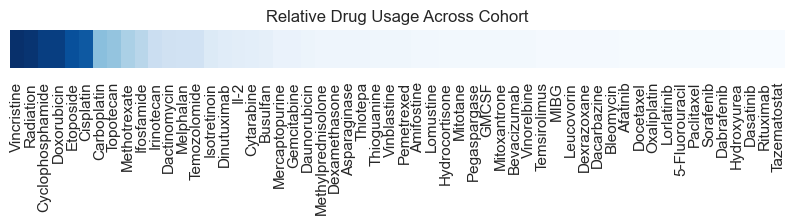

In [119]:
import numpy as np
import pandas as pd

drug_counts = KZM_drugs_pat_post.sum().sort_values(ascending=False)
df_tile = pd.DataFrame({'Drug': drug_counts.index, 'Patients': drug_counts.values})

# Normalize to [0,1] for visual scale
df_tile['Normalized'] = df_tile['Patients'] / df_tile['Patients'].max()

plt.figure(figsize=(10, 0.5))
sns.heatmap(df_tile[['Normalized']].T, cmap="Blues", cbar=False, xticklabels=df_tile['Drug'])
plt.xticks(rotation=90)
plt.yticks([])
plt.title("Relative Drug Usage Across Cohort")
plt.tight_layout()
plt.show()


In [136]:
filtered_counts

Vincristine           121
Radiation             119
Cyclophosphamide      114
Doxorubicin           114
Etoposide             106
Cisplatin             102
Carboplatin            52
Topotecan              49
Methotrexate           41
Ifosfamide             36
Irinotecan             28
Dactinomycin           25
Melphalan              24
Temozolomide           24
Isotretinoin           17
Dinutuximab            15
Il-2                   14
Cytarabine             13
Busulfan               12
Mercaptopurine          9
Gemcitabine             9
Daunorubicin            8
Methylprednisolone      7
Dexamethasone           7
Asparaginase            7
Thiotepa                7
Thioguanine             6
Vinblastine             6
Pemetrexed              6
Amifostine              5
Lomustine               5
Hydrocortisone          4
Mitotane                4
Pegaspargase            4
GMCSF                   4
Mitoxantrone            4
Bevacizumab             4
Vinorelbine             4
Temsirolimus

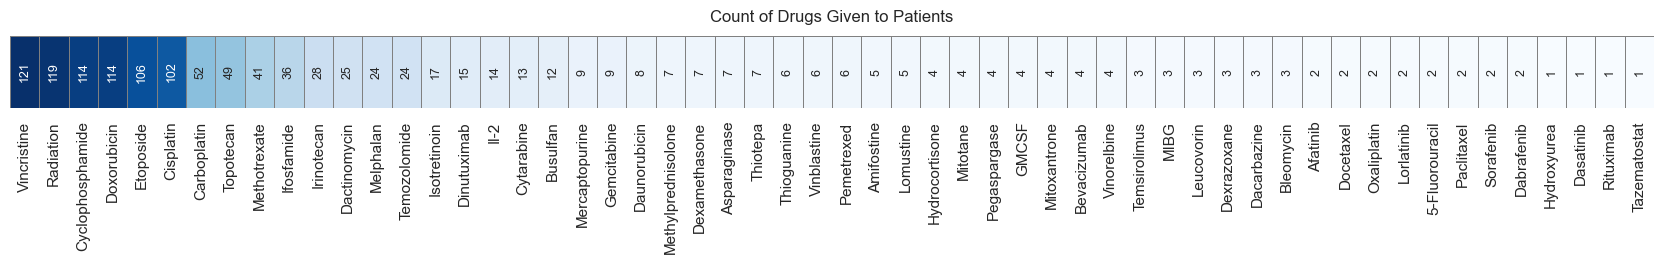

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute and filter drug counts
drug_counts = KZM_drugs_pat_post.sum().sort_values(ascending=False)
filtered_counts = drug_counts[drug_counts >5]

# Build DataFrame
df_tile = pd.DataFrame({
    'Drug': filtered_counts.index,
    'Patients': filtered_counts.values
})
df_tile['Normalized'] = df_tile['Patients'] / df_tile['Patients'].max()

# Create annotation matrix (1-row with patient counts)
annot_matrix = df_tile['Patients'].values.reshape(1, -1)

# Plot
plt.figure(figsize=(max(8, len(filtered_counts) * 0.3), 2.8))
sns.heatmap(
    df_tile[['Normalized']].T,
    cmap="Blues",
    cbar=False,
    xticklabels=df_tile['Drug'],
    yticklabels=[],
    annot=annot_matrix,
    fmt='d',
    annot_kws={"rotation": 90, "va": "center", "ha": "center", "fontsize": 9},
    linewidths=0.5,
    linecolor='gray'
)

plt.xticks(rotation=90)
plt.title("Count of Drugs Given to Patients", pad=10)
plt.tight_layout()
plt.show()


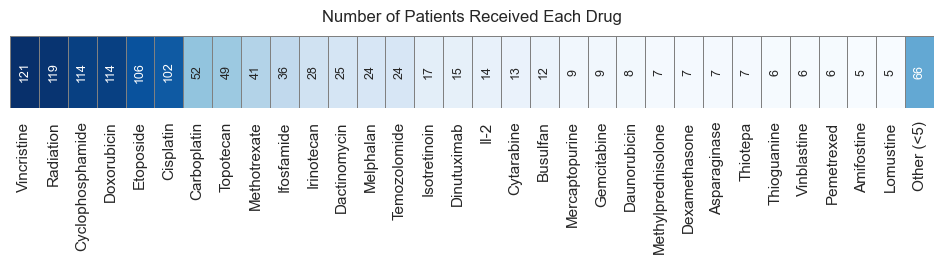

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute drug counts
drug_counts = KZM_drugs_pat_post.sum().sort_values(ascending=False)

# Separate into frequent and rare drugs
threshold = 5
frequent = drug_counts[drug_counts >= threshold]
rare_total = drug_counts[drug_counts < threshold].sum()


# Combine with 'Other' using concat (not append)
drug_counts_grouped = pd.concat([frequent, pd.Series({'Other (<5)': rare_total})])

# Build DataFrame
df_tile = pd.DataFrame({
    'Drug': drug_counts_grouped.index,
    'Patients': drug_counts_grouped.values
})
df_tile['Normalized'] = df_tile['Patients'] / df_tile['Patients'].max()

# Create annotation matrix
annot_matrix = df_tile['Patients'].values.reshape(1, -1)

# Plot
plt.figure(figsize=(max(8, len(df_tile) * 0.3), 2.8))
sns.heatmap(
    df_tile[['Normalized']].T,
    cmap="Blues",
    cbar=False,
    xticklabels=df_tile['Drug'],
    yticklabels=[],
    annot=annot_matrix,
    fmt='d',
    annot_kws={"rotation": 90, "va": "center", "ha": "center", "fontsize": 9},
    linewidths=0.5,
    linecolor='gray'
)

plt.xticks(rotation=90)
plt.title("Number of Patients Received Each Drug", pad=10)
plt.tight_layout()
plt.show()


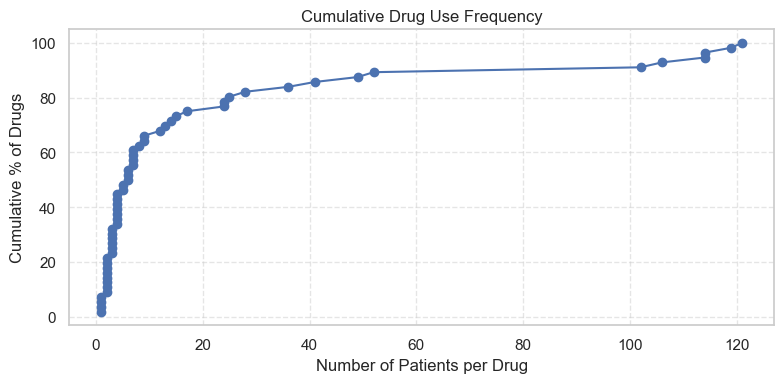

In [110]:
import numpy as np

drug_counts = KZM_drugs_pat_post.sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sorted_counts = np.sort(drug_counts.values)
cum = np.arange(1, len(sorted_counts)+1) / len(sorted_counts)
plt.plot(sorted_counts, cum * 100, marker='o')
plt.xlabel("Number of Patients per Drug")
plt.ylabel("Cumulative % of Drugs")
plt.title("Cumulative Drug Use Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


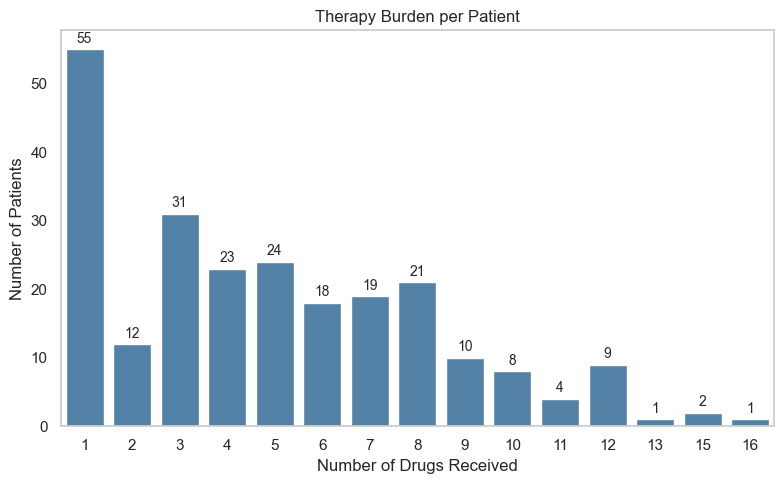

In [101]:
patient_totals = KZM_drugs_pat_post.sum(axis=1)

counts = patient_totals.value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=counts.index, y=counts.values, color='steelblue')

# Add count labels on top of each bar
for i, count in enumerate(counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Clean up plot
ax.set_xlabel("Number of Drugs Received")
ax.set_ylabel("Number of Patients")
ax.set_title("Therapy Burden per Patient")
ax.grid(False)  # Turn off gridlines

plt.tight_layout()
plt.show()


/Users/mehdi/Documents/py_envs/ml_sigs/lib/python3.9/site-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values


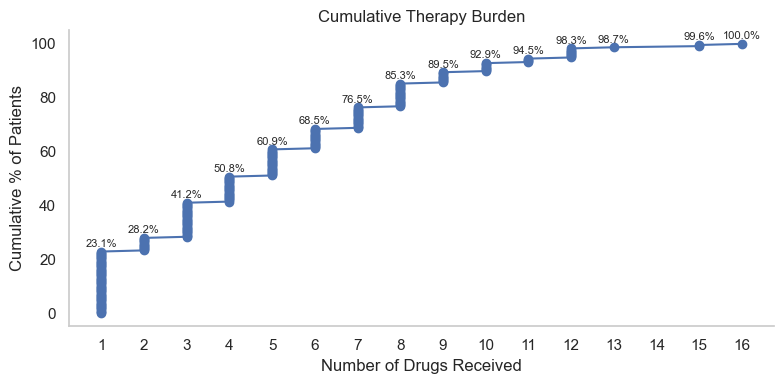

In [127]:
from statsmodels.distributions.empirical_distribution import ECDF

# Compute ECDF
ecdf = ECDF(patient_totals)
x_vals = pd.Series(ecdf.x)
y_vals = pd.Series(ecdf.y * 100)

# Find the max y for each unique x
df_ecdf = pd.DataFrame({'x': x_vals, 'y': y_vals})
df_ecdf_unique = df_ecdf.groupby('x', as_index=False).max()

# Plot ECDF
plt.figure(figsize=(8, 4))
plt.plot(ecdf.x, ecdf.y * 100, marker='o', linestyle='-')

# Add labels only at max cumulative % per x
for x, y in zip(df_ecdf_unique['x'], df_ecdf_unique['y']):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center', va='bottom', fontsize=8)

# Format plot
plt.xticks(range(patient_totals.min(), patient_totals.max() + 1))
plt.xlabel("Number of Drugs Received")
plt.ylabel("Cumulative % of Patients")
plt.title("Cumulative Therapy Burden")
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.grid(False)
plt.tight_layout()
plt.show()

In [73]:
## Reshaping drugs df from a wide format to a long format.
KZM_pat_mlt = pd.melt(KZM_drugs_pat, id_vars=['Patient_id'], value_vars=KZM_drugs_pat.columns[0:-1].tolist())
KZM_pat_mlt.columns = ['Patient', 'Treatment', 'Count']
KZM_pat_mlt['Class'] = KZM_pat_mlt.Treatment.map(drug_class_dict)
KZM_pat_mlt['Subclass'] = KZM_pat_mlt.Treatment.map(drug_subclass_dict)
KZM_pat_mlt.Subclass = ['Other' if x=='Antitumor antibiotic' else x for x in KZM_pat_mlt.Subclass]
KZM_pat_mlt.head(2)

,Patient,Treatment,Count,Class,Subclass
0,KiCS0002,Dacarbazine,0,Alkylating agent,Hydrazines and Triazines
1,KiCS0003,Dacarbazine,0,Alkylating agent,Hydrazines and Triazines


In [22]:
KZM_pat_mlt['Type'] = [kzm611_md.loc[kzm611_md.Patient_id==x, 'Type'].values[0] for x in KZM_pat_mlt.Patient]
KZM_pat_mlt.head(2)

,Patient,Treatment,Count,Class,Subclass,Type
0,KiCS0002,Dacarbazine,0,Alkylating agent,Hydrazines and Triazines,GCT
1,KiCS0003,Dacarbazine,0,Alkylating agent,Hydrazines and Triazines,MFT


In [23]:
## Reshaping drugs df from a wide format to a long format.
KZM_drugs_mlt = pd.melt(KZM_drugs_df, id_vars=['Type'], value_vars=KZM_drugs_df.columns[0:-1].tolist())
KZM_drugs_mlt.columns = ['Type', 'Treatment', 'Count']
KZM_drugs_mlt['Class'] = KZM_drugs_mlt.Treatment.map(drug_class_dict)
KZM_drugs_mlt['Subclass'] = KZM_drugs_mlt.Treatment.map(drug_subclass_dict)
KZM_drugs_mlt.head(2)

,Type,Treatment,Count,Class,Subclass
0,GCT,Dacarbazine,0,Alkylating agent,Hydrazines and Triazines
1,MFT,Dacarbazine,0,Alkylating agent,Hydrazines and Triazines


In [24]:
print(f"The number of therapies given to 2 or more tumours: {KZM_drugs_mlt.Treatment.nunique()}")

The number of therapies given to 2 or more tumours: 56


In [25]:
## Get cancer type total & treated sample numbers
type_counts = pd.DataFrame(kzm611_md.Type.value_counts())
type_counts.columns = ['Counts']
type_counts['Type'] = type_counts.index.tolist()

type_post = []

for x in type_counts.Type:
    thr_tab = pd.DataFrame(kzm611_md.loc[kzm611_md.Type==x, 'Therapy'].value_counts())
    if 'Post-Therapy' in thr_tab.index.tolist():
        type_post.append(thr_tab.loc['Post-Therapy', 'count'])
    else:
        type_post.append(0)

type_counts['Treated'] = type_post

type_counts.Type = [x if type_counts.loc[x, 'Counts']>2 else 'Other' for x in type_counts.Type]
type_counts = type_counts.reset_index(drop=True)
type_counts = type_counts.groupby(['Type']).sum()
type_counts['Type'] = type_counts.index.tolist()
type_counts = type_counts.sort_values(['Counts'], ascending=False)
type_counts = type_counts.reindex(type_counts.index.drop('Other').tolist() + ['Other'])
type_counts.head(2)

,Counts,Treated,Type
Type,,,
NBL,88,78,NBL
HGG,54,21,HGG


In [51]:
type_counts.tail()

,Counts,Treated,Type
Type,,,
SPINDLE,3,1,SPINDLE
CD,3,2,CD
ASPS,3,1,ASPS
CPC,3,2,CPC
Other,83,34,Other


In [26]:
## Cleaning up some data types & collapsing low-number types into Other
KZM_drugs_mlt.Type = [x if x in type_counts.Type.tolist() else 'Other' for x in KZM_drugs_mlt.Type]
KZM_drugs_mlt.Subclass = ['Other' if x=='Antitumor antibiotic' else x for x in KZM_drugs_mlt.Subclass]

KZM_drugs_mlt.tail(2)

,Type,Treatment,Count,Class,Subclass
34214,DMG,Radiation,0,Radiation,Radiation
34215,ARMS,Radiation,1,Radiation,Radiation


In [27]:
KZM_drugs_mlt.Treatment.nunique(), KZM_drugs_mlt.Subclass.nunique()

(56, 15)

In [28]:
## Order therapy classes based on therapies above
class_order = ['Radiation', 'Mustard gas derivative', 'Anthracyclines', 'Vinca alkaloids', 'Podophyllotoxins', 'Platinums', 'Camptothecin analogs', 
               'Antimetabolite', 'Chromomycins', 'Hydrazines and Triazines', 'Targeted therapy', 'Monoclonal antibody',
               'Alkylating agent, Other', 'Taxanes', 'Other']
len(class_order)

#class_sizes = {cl: KZM_drugs_mlt[KZM_drugs_mlt.Subclass==cl].Treatment.nunique() for cl in class_order}

class_sizes = {cl: KZM_pat_mlt[KZM_pat_mlt.Subclass==cl].Treatment.nunique() for cl in class_order}
class_sizes

{'Radiation': 1,
 'Mustard gas derivative': 3,
 'Anthracyclines': 3,
 'Vinca alkaloids': 3,
 'Podophyllotoxins': 1,
 'Platinums': 3,
 'Camptothecin analogs': 2,
 'Antimetabolite': 8,
 'Chromomycins': 1,
 'Hydrazines and Triazines': 2,
 'Targeted therapy': 7,
 'Monoclonal antibody': 3,
 'Alkylating agent, Other': 3,
 'Taxanes': 2,
 'Other': 14}

In [29]:
KZM_drugs_mlt[KZM_drugs_mlt.Subclass=='Taxanes'].Treatment.nunique()

2

In [30]:
KZM_drugs_mlt['Type_cat'] = pd.Categorical(
    KZM_drugs_mlt['Type'], 
    categories=type_counts.Type.tolist()[::-1], 
    ordered=True
)
KZM_drugs_mlt['Treat_cat'] = pd.Categorical(
    KZM_drugs_mlt['Subclass'], 
    categories=class_order, 
    ordered=True
)

KZM_drugs_mlt = KZM_drugs_mlt.sort_values(['Type_cat', 'Treat_cat'], ascending=False)
KZM_drugs_mlt['Presence'] = [0 if x==0 else 1 for x in KZM_drugs_mlt.Count]
KZM_drugs_mlt.head(2)

,Type,Treatment,Count,Class,Subclass,Type_cat,Treat_cat,Presence
617,NBL,MIBG,0,Other,Other,NBL,Other,0
618,NBL,MIBG,0,Other,Other,NBL,Other,0


In [31]:
KZM_pat_mlt['Type_cat'] = pd.Categorical(
    KZM_pat_mlt['Type'], 
    categories=type_counts.Type.tolist()[::-1], 
    ordered=True
)
KZM_pat_mlt['Treat_cat'] = pd.Categorical(
    KZM_pat_mlt['Subclass'], 
    categories=class_order, 
    ordered=True
)

KZM_pat_mlt = KZM_pat_mlt.sort_values(['Type_cat', 'Treat_cat'], ascending=False)
KZM_pat_mlt['Presence'] = [0 if x==0 else 1 for x in KZM_pat_mlt.Count]
KZM_pat_mlt.head(2)

,Patient,Treatment,Count,Class,Subclass,Type,Type_cat,Treat_cat,Presence
617,KiCS0006,MIBG,0,Other,Other,NBL,NBL,Other,0
618,KiCS0007,MIBG,0,Other,Other,NBL,NBL,Other,0


In [32]:
## Converting drug df into broader drug class df
KZM_class_df = KZM_drugs_df.drop(['Type'], axis=1).copy()

KZM_class_df.columns = [drug_subclass_dict[x] for x in KZM_class_df.columns]
KZM_class_df = KZM_class_df.groupby(level=0, axis=1).sum()

## Reshaping broad df from a wide format to a long format.
KZM_class_df['Type'] = [kzm611_md.loc[x, 'Type'] for x in KZM_class_df.index]
KZM611_broad_mlt = pd.melt(KZM_class_df, id_vars=['Type'], value_vars=KZM_class_df.columns[0:-1].tolist())
KZM611_broad_mlt.columns = ['Type', 'Treatment', 'Count']

## Cleaning up some data types
KZM611_broad_mlt.Type = [x if x in type_counts.Type.unique() else 'Other' for x in KZM611_broad_mlt.Type]
KZM611_broad_mlt.Treatment = ['Other' if x=='Antitumor antibiotic' else x for x in KZM611_broad_mlt.Treatment]

KZM611_broad_mlt = KZM611_broad_mlt[KZM611_broad_mlt.Type.isin(type_counts.Type.tolist())]


KZM611_broad_mlt['Type_cat'] = pd.Categorical(
    KZM611_broad_mlt['Type'], 
    categories=type_counts.Type.tolist()[::-1], 
    ordered=True
)

KZM611_broad_mlt['Treat_cat'] = pd.Categorical(
    KZM611_broad_mlt['Treatment'], 
    categories=class_order, 
    ordered=True
)

KZM611_broad_mlt = KZM611_broad_mlt.sort_values(['Type_cat', 'Treat_cat'], ascending=False)
KZM611_broad_mlt['Presence'] = [0 if x==0 else 1 for x in KZM611_broad_mlt.Count]

KZM611_broad_mlt.head(3)

/var/folders/v_/5kvb1yw12gg5hlp_37y4c84w0000gp/T/ipykernel_36865/1770584545.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  KZM_class_df = KZM_class_df.groupby(level=0, axis=1).sum()


,Type,Treatment,Count,Type_cat,Treat_cat,Presence
1839,NBL,Other,0,NBL,Other,0
1840,NBL,Other,0,NBL,Other,0
1854,NBL,Other,0,NBL,Other,0


In [35]:
KZM_class_df.head()

,"Alkylating agent, Other",Anthracyclines,Antimetabolite,Antitumor antibiotic,Camptothecin analogs,Chromomycins,Hydrazines and Triazines,Monoclonal antibody,Mustard gas derivative,Other,Platinums,Podophyllotoxins,Radiation,Targeted therapy,Taxanes,Vinca alkaloids,Type
KiCS0002_321321,0,0,0,4,0,0,0,0,1,0,7,6,0,0,1,0,GCT
KiCS0003_285201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MFT
KiCS0003_285202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MFT
KiCS0003_20_15220_A_02_00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,MFT
KiCS0005_300238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PGL


In [37]:
KZM_class_df.groupby('Type').sum().head()

,"Alkylating agent, Other",Anthracyclines,Antimetabolite,Antitumor antibiotic,Camptothecin analogs,Chromomycins,Hydrazines and Triazines,Monoclonal antibody,Mustard gas derivative,Other,Platinums,Podophyllotoxins,Radiation,Targeted therapy,Taxanes,Vinca alkaloids
Type,,,,,,,,,,,,,,,,
ACC,0,7,0,0,0,0,0,0,0,7,7,7,0,0,0,0
ACPP,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1
AF,0,2,1,0,29,0,7,0,24,3,2,2,1,0,0,3
AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ALCL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


['MIBG', 'Dexrazoxane', 'Isotretinoin', 'Amifostine', 'Il-2', 'Dexamethasone', 'Methylprednisolone', 'Bleomycin', 'Pegaspargase', 'Mitotane', 'Hydrocortisone', 'GMCSF', 'Asparaginase', 'Leucovorin', 'Docetaxel', 'Paclitaxel', 'Busulfan', 'Thiotepa', 'Lomustine', 'Bevacizumab', 'Rituximab', 'Dinutuximab', 'Tazematostat', 'Sorafenib', 'Lorlatinib', 'Temsirolimus', 'Afatinib', 'Dabrafenib', 'Dasatinib', 'Dacarbazine', 'Temozolomide', 'Dactinomycin', 'Thioguanine', 'Methotrexate', 'Pemetrexed', '5-Fluorouracil', 'Hydroxyurea', 'Mercaptopurine', 'Gemcitabine', 'Cytarabine', 'Topotecan', 'Irinotecan', 'Oxaliplatin', 'Carboplatin', 'Cisplatin', 'Etoposide', 'Vinblastine', 'Vinorelbine', 'Vincristine', 'Daunorubicin', 'Doxorubicin', 'Mitoxantrone', 'Cyclophosphamide', 'Ifosfamide', 'Melphalan', 'Radiation']


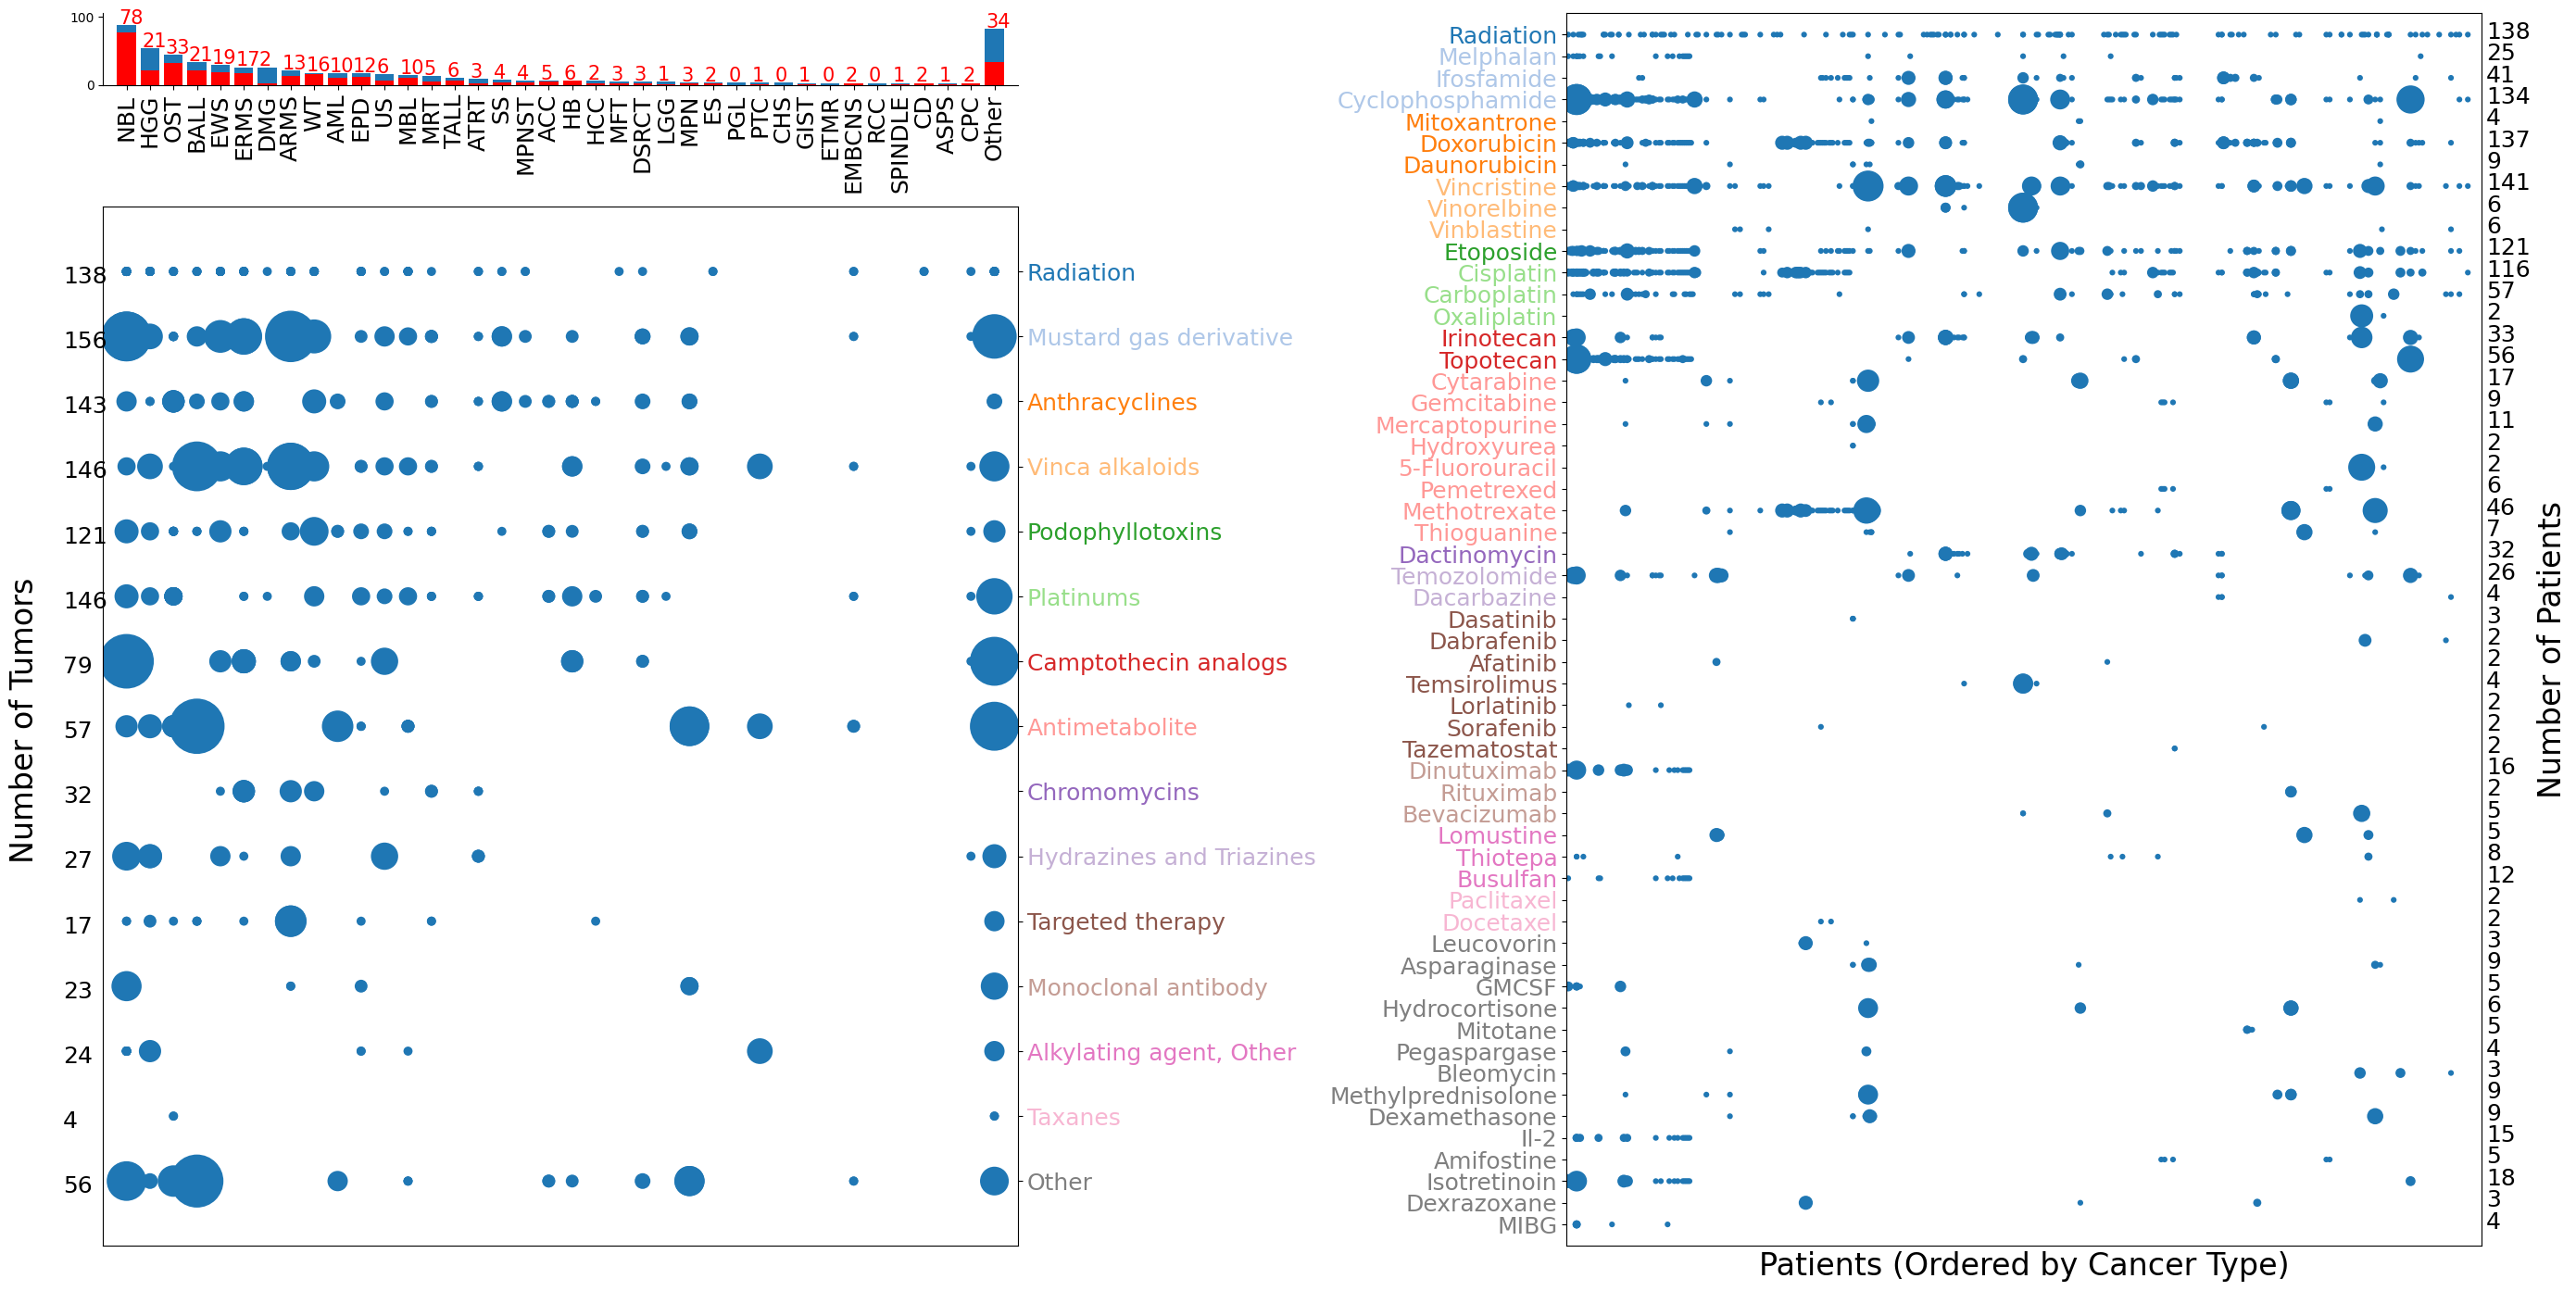

In [37]:
import matplotlib.gridspec as gridspec

tab20_cols = sns.color_palette("tab20")

fig = plt.figure(figsize=(28, 14))
gs = gridspec.GridSpec(7, 4)
ax1 = plt.subplot(gs[0, :-2])
ax2 = plt.subplot(gs[1:, :-2])
ax3 = plt.subplot(gs[:, 2:])

ax1.bar(type_counts.Type, type_counts.Counts)
ax1.set_xlim([-1, len(KZM611_broad_mlt.Type.unique())])
ax1.set_ylim([0, 106])

ax1.bar(type_counts.Type, type_counts.Treated, color='red')
for i, v in enumerate(type_counts.Treated):
    ax1.text(i-0.35, type_counts.Counts.iloc[i] + 2, str(v), color='red', fontsize=15)
    
plt.setp(ax1.get_xticklabels(), rotation=90, fontsize=18)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

#plot categorical scatter plot
ax2.scatter(KZM611_broad_mlt.Type, KZM611_broad_mlt.Treatment, edgecolors='k',
                 s=KZM611_broad_mlt.Count*50,# c=KZM611_broad_mlt.Color, 
                 zorder=2, linewidths=0)

ax2.set_ylim([-1, len(KZM611_broad_mlt.Treatment.unique())])
ax2.set_xlim([-1, len(KZM611_broad_mlt.Type.unique())])

#ax2.xaxis.tick_top()
ax2.yaxis.tick_right()

class_counts = KZM611_broad_mlt.groupby(['Treatment']).sum('Presence')
x = 0
for d in class_order[::-1]:
    ax2.text(-2.7, x-0.18, str(class_counts.loc[d, 'Presence']), fontsize=18)
    x+=1

ax2.text(-5, 5, 'Number of Tumors', rotation=90, fontsize=24)

labels = ax2.get_yticklabels()
for ind, label in enumerate(labels[::-1]):
    label.set_color(tab20_cols[ind])
    #label.set_fontsize(24)  ## Bigger or bold font?

ax2.set_xticklabels([])
#plt.setp(ax2.get_xticklabels(), rotation=90, fontsize=18)
    
#plot categorical scatter plot mlt2
'''ax3.scatter(KZM_drugs_mlt.Type, KZM_drugs_mlt.Treatment, edgecolors='k',
                 s=KZM_drugs_mlt.Count*20,
                 zorder=2, linewidths=0)

ax3.set_ylim([-1, len(KZM_drugs_mlt.Treatment.unique())])
ax3.set_xlim([-1, len(KZM_drugs_mlt.Type.unique())])'''

ax3.scatter(KZM_pat_mlt.Patient, KZM_pat_mlt.Treatment, edgecolors='k',
                 s=KZM_pat_mlt.Count*20,
                 zorder=2, linewidths=0)

ax3.set_ylim([-1, len(KZM_pat_mlt.Treatment.unique())])
ax3.set_xlim([-1, len(KZM_pat_mlt.Patient.unique())])

ax3.set_xticklabels([])
ax3.set_xticks([])
ax3.set_xlabel('Patients (Ordered by Cancer Type)', fontsize=24)
#ax3.xaxis.tick_top()
#plt.setp(ax3.get_xticklabels(), fontsize=18, rotation=90)
plt.setp(ax3.get_yticklabels(), fontsize=18)
'''plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)'''

ax3.text(575, 20, 'Number of Patients', rotation=90, fontsize=24)

drug_counts = KZM_pat_mlt.groupby(['Treatment']).sum('Presence')
x = 0
for d in KZM_pat_mlt.Treatment.unique().tolist():
    ax3.text(545, x-0.18, str(drug_counts.loc[d, 'Presence']), fontsize=18)
    x+=1

print(KZM_pat_mlt.Treatment.unique().tolist())

xc = -10
trans = ax3.get_xaxis_transform()
coords = []
end = 0.985
length = 0.0152
pad = 0.0223

color_dict = {}
col_ind = 0
thr_ind = 0
for key, value in class_sizes.items():
    for i in range(value):
        color_dict[thr_ind] = tab20_cols[col_ind]
        thr_ind += 1
    col_ind += 1

'''for i in range(len(coords)):
    ax3.plot([xc,xc],[coords[i][0],coords[i][1]], color=tab20_cols[i], transform=trans, clip_on=False, linewidth=5)'''

labels3 = ax3.get_yticklabels()
for ind, label in enumerate(labels3[::-1]):
    label.set_color(color_dict[ind])

plt.setp(ax2.get_yticklabels(), fontsize=18)
#ax2.set_xticklabels('')
ax2.tick_params(bottom=False)
    
fig.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_1bcd.pdf'), bbox_inches="tight")

In [33]:
type_counts.head()

,Counts,Treated,Type
Type,,,
NBL,88,78,NBL
HGG,54,21,HGG
OST,44,33,OST
BALL,34,21,BALL
EWS,30,19,EWS


In [34]:
KZM611_broad_mlt.head()

,Type,Treatment,Count,Type_cat,Treat_cat,Presence
1839,NBL,Other,0,NBL,Other,0
1840,NBL,Other,0,NBL,Other,0
1854,NBL,Other,0,NBL,Other,0
1855,NBL,Other,0,NBL,Other,0
1864,NBL,Other,0,NBL,Other,0


In [50]:
KZM_class_df[KZM_class_df.Type=='PNET']

,"Alkylating agent, Other",Anthracyclines,Antimetabolite,Antitumor antibiotic,Camptothecin analogs,Chromomycins,Hydrazines and Triazines,Monoclonal antibody,Mustard gas derivative,Other,Platinums,Podophyllotoxins,Radiation,Targeted therapy,Taxanes,Vinca alkaloids,Type
KiCS0235_18_4828,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PNET
zcc243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PNET


In [54]:
kzm_class_bin.Type.value_counts()['NBL']

88

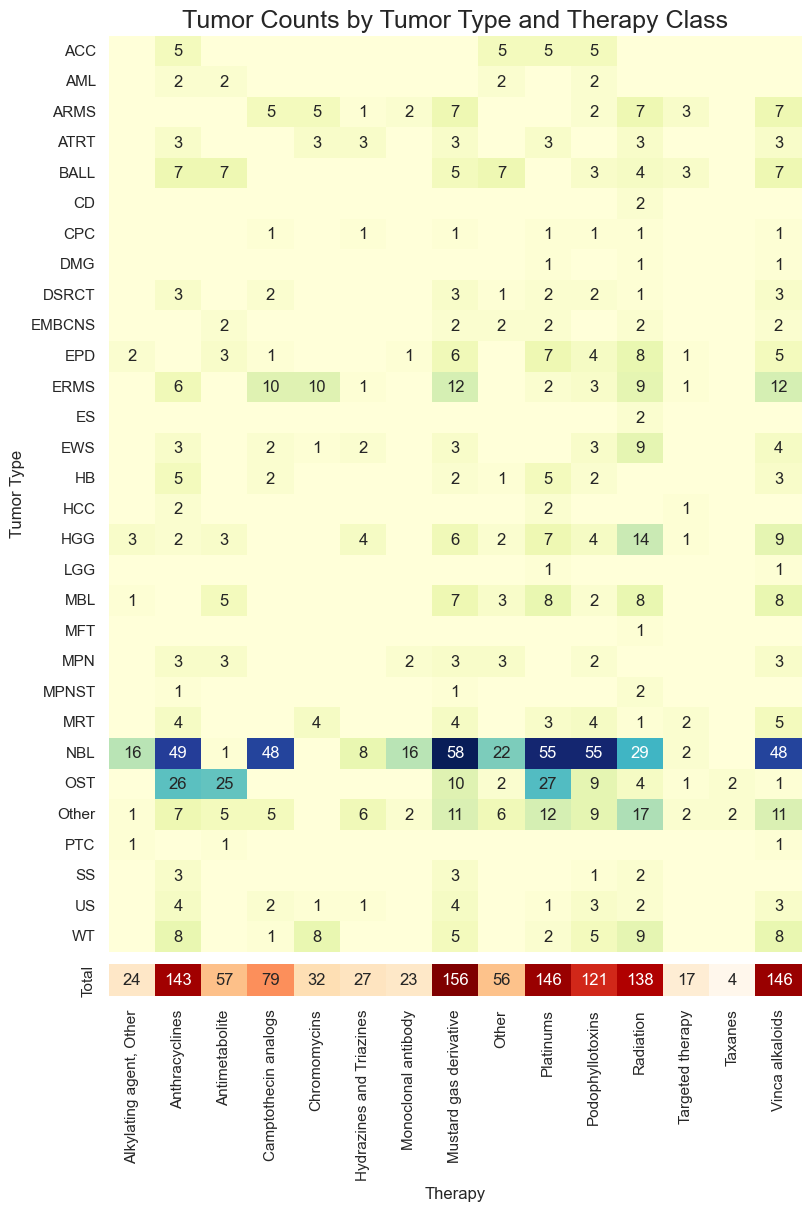

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

'''# Sample data: Tumor types
tumor_types = ['Neuroblastoma', 'Osteosarcoma', 'Leukemia', 'Brain Tumor', 'Lymphoma']

# Sample data: Therapies (like Radiation, Platinum, Mustard gas derivatives)
therapies = ['Radiation', 'Platinum', 'Mustard Gas', 'Topoisomerase Inhibitors', 'Other Chemo']

# Generate a random counts matrix for how many tumors of each type received each therapy
np.random.seed(42)
data_counts = np.random.randint(0, 40, size=(len(tumor_types), len(therapies)))

# Create a DataFrame for plotting
df_counts = pd.DataFrame(data_counts, index=tumor_types, columns=therapies)'''
kzm_class_bin = KZM_class_df.copy()
kzm_class_bin['Other'] = kzm_class_bin['Other'] + kzm_class_bin['Antitumor antibiotic'] 
kzm_class_bin.iloc[:, 0:-1] = kzm_class_bin.iloc[:, 0:-1].map(lambda x: 1 if x != 0 else 0)
kzm_class_bin.Type = [x if kzm_class_bin.Type.value_counts()[x]>2 else 'Other' for x in kzm_class_bin.Type]
kzm_class_bin['Total'] = kzm_class_bin.iloc[:, 0:-1].sum(axis=1)
kzm_class_bin = kzm_class_bin[kzm_class_bin.Total>0]
kzm_class_bin =kzm_class_bin.drop(['Total', 'Antitumor antibiotic'], axis=1)
df_counts = kzm_class_bin.groupby('Type').sum()


# Panel 1: Heatmap of tumor counts by tumor type and therapy
# Panel 2: Row sums = number of tumors receiving each therapy
therapy_totals = df_counts.sum(axis=0)
# Panel 3: Column sums = number of tumors per tumor type
tumor_totals = df_counts.sum(axis=1)

# Set up figure with 3 heatmap panels stacked vertically
fig, axs = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [29, 1]}, constrained_layout=True)

annot_data = df_counts.copy()
annot_data = annot_data.map(lambda x: f"{x}" if x != 0 else "")
# 1) Main heatmap: tumor counts by tumor type (rows) and therapy (columns)
sns.heatmap(df_counts, annot=annot_data, fmt='', cmap='YlGnBu', cbar=False, ax=axs[0])
axs[0].set_title('Tumor Counts by Tumor Type and Therapy Class', fontsize=18)
axs[0].set_ylabel('Tumor Type')

# Hide x-axis labels on top panel to avoid repetition
axs[0].set_xticklabels([])
axs[0].set_xlabel('')

# 2) Therapy counts heatmap (single row)
df_therapy_totals = pd.DataFrame(therapy_totals).T
df_therapy_totals.index = ['Total']

sns.heatmap(df_therapy_totals, annot=True, fmt='d', cmap='OrRd', cbar=False, ax=axs[1])
axs[1].set_title('')
axs[1].set_xlabel('Therapy')
axs[1].set_ylabel('')


plt.show()


In [ ]:
df_therapy_totals

,"Alkylating agent, Other",Anthracyclines,Antimetabolite,Antitumor antibiotic,Camptothecin analogs,Chromomycins,Hydrazines and Triazines,Monoclonal antibody,Mustard gas derivative,Other,Platinums,Podophyllotoxins,Radiation,Targeted therapy,Taxanes,Vinca alkaloids
Total,24,143,57,3,79,32,27,23,156,53,146,121,138,17,4,146


In [42]:
KZM_class_df.head()

,"Alkylating agent, Other",Anthracyclines,Antimetabolite,Antitumor antibiotic,Camptothecin analogs,Chromomycins,Hydrazines and Triazines,Monoclonal antibody,Mustard gas derivative,Other,Platinums,Podophyllotoxins,Radiation,Targeted therapy,Taxanes,Vinca alkaloids,Type
KiCS0002_321321,0,0,0,4,0,0,0,0,1,0,7,6,0,0,1,0,GCT
KiCS0003_285201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MFT
KiCS0003_285202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MFT
KiCS0003_20_15220_A_02_00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,MFT
KiCS0005_300238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PGL
